<a href="https://colab.research.google.com/github/varshadesilva/CNN-Cifar10/blob/master/CNN_with_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Convolutional Neural Network with Cifar-10 dataset**

This project involves building an image classifier using a CNN with the cifar-10 dataset. The Cifar-10 dataset consists of 60000 32 x 32 color images. There are 10 classes and 6000 images per class. The dataset is separated into 50000 training images and 10000 test images.

In [ ]:
#importing libraries
import keras
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical 
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


Using TensorFlow backend.


## Loading Cifar-10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Examining the data

The following shows that there are 50000 images in the training set with each image represented as 32 x 32 RGB pixels. Since these are color images, there are red, green and blue channels with a total of 32x32x3 = 3072 features per image. The training set also includes 60000 labels where each label is an integer between 0-9. Likewise, there are 10000 images in the test set and 10000 labels.

In [ ]:
print('Shape of training data')
print(x_train.shape)
print(y_train.shape)
print('Shape of test data')
print(x_test.shape)
print(y_test.shape)

Shape of training data
(50000, 32, 32, 3)
(50000, 1)
Shape of test data
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
#storing class names in an array to use later for plotting images
class_names = ['airplane', 'automobile', 'bird', 'car', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
class_names = np.array(class_names)

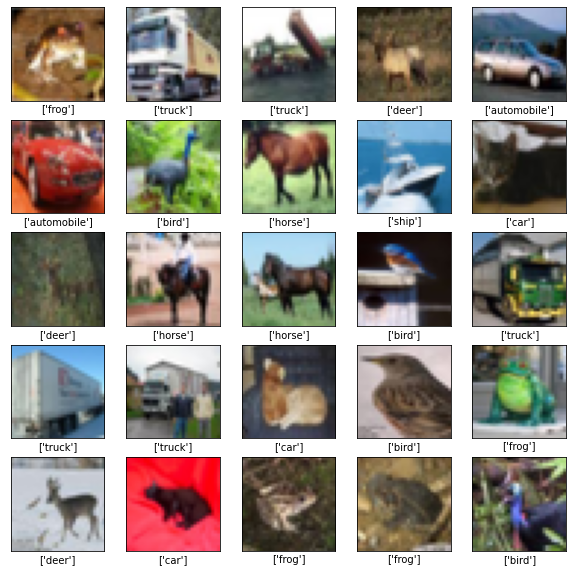

In [ ]:
# Displaying the first 25 images from the training data along with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

As we can see from the images above, each image contains only one object in the corresponding class.

In [ ]:
# Transform label indices to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Preprocessing Data

The pixel values in an image range from 0-255. These must be scaled to a range of 0 to 1 before feeding the neural network. To do so values are converted to floats and then divided by 255.

In [ ]:
# normalize inputs from 0-255 to 0.0-1.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

The training data is split to get a validation set. This validation data will be used to get an unbiased evaluation of the model fit on training data while tuning model hyperparameters. 20% of the training data will be used as validation samples.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

print('train images shape:', x_train.shape)
print('validation images shape:', x_val.shape)

train images shape: (40000, 32, 32, 3)
validation images shape: (10000, 32, 32, 3)


## Building the Model

To start, a model was built with 2 convolution layers, a MaxPool layer and 2 fully connected dense layers. The last dense layer is a softmax layer.

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model1.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data= (x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 8s - loss: 1.5309 - accuracy: 0.4514 - val_loss: 1.2196 - val_accuracy: 0.5610
Epoch 2/15
 - 6s - loss: 1.0937 - accuracy: 0.6142 - val_loss: 1.0518 - val_accuracy: 0.6244
Epoch 3/15
 - 6s - loss: 0.8536 - accuracy: 0.7011 - val_loss: 0.9925 - val_accuracy: 0.6483
Epoch 4/15
 - 6s - loss: 0.6426 - accuracy: 0.7729 - val_loss: 1.0038 - val_accuracy: 0.6583
Epoch 5/15
 - 6s - loss: 0.4544 - accuracy: 0.8433 - val_loss: 1.1915 - val_accuracy: 0.6518
Epoch 6/15
 - 6s - loss: 0.2883 - accuracy: 0.8984 - val_loss: 1.3229 - val_accuracy: 0.6515
Epoch 7/15
 - 6s - loss: 0.1984 - accuracy: 0.9327 - val_loss: 1.5598 - val_accuracy: 0.6543
Epoch 8/15
 - 6s - loss: 0.1519 - accuracy: 0.9478 - val_loss: 1.7757 - val_accuracy: 0.6438
Epoch 9/15
 - 6s - loss: 0.1251 - accuracy: 0.9564 - val_loss: 1.9848 - val_accuracy: 0.6483
Epoch 10/15
 - 6s - loss: 0.1222 - accuracy: 0.9584 - val_loss: 2.0562 - val_accuracy: 0.6332
Epoch 11/15
 - 6s -

In [ ]:
#function to evaluate model performance on test samples and plot training history
def evaluate_plotLosses(model, history):  
    score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
    print('Test loss: %.3f' % score[0])
    print('Test accuracy: %.3f' % score[1])

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Test loss: 2.660
Test accuracy: 0.641


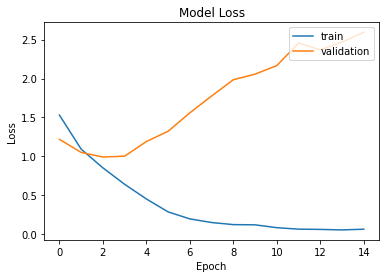

In [ ]:
evaluate_plotLosses(model1, history)

We observe the issue of overfitting in the plot above. At the last few epochs the validation loss is much higher than the training loss. The accuracy of the test dataset is also lower than the accuracy of the training dataset. This difference between training and test accuracy represents overfitting. A regularization technique has to be used to reduce overfitting. Next, dropout was used which randomly drops some neurons from the network when processing a batch during training. This forces each neuron to learn on its own rather than relying on other neurons.

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
# Dropout layer added here
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model2.fit(x_train, y_train, batch_size=32, epochs=15, verbose=2, validation_data= (x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 6s - loss: 1.6857 - accuracy: 0.3850 - val_loss: 1.3400 - val_accuracy: 0.5143
Epoch 2/15
 - 6s - loss: 1.3506 - accuracy: 0.5128 - val_loss: 1.1507 - val_accuracy: 0.5912
Epoch 3/15
 - 6s - loss: 1.1789 - accuracy: 0.5811 - val_loss: 1.0715 - val_accuracy: 0.6194
Epoch 4/15
 - 6s - loss: 1.0800 - accuracy: 0.6166 - val_loss: 1.0541 - val_accuracy: 0.6311
Epoch 5/15
 - 6s - loss: 0.9933 - accuracy: 0.6494 - val_loss: 0.9712 - val_accuracy: 0.6610
Epoch 6/15
 - 6s - loss: 0.9180 - accuracy: 0.6763 - val_loss: 1.0033 - val_accuracy: 0.6529
Epoch 7/15
 - 6s - loss: 0.8608 - accuracy: 0.6956 - val_loss: 0.9839 - val_accuracy: 0.6574
Epoch 8/15
 - 6s - loss: 0.8074 - accuracy: 0.7139 - val_loss: 0.9560 - val_accuracy: 0.6778
Epoch 9/15
 - 6s - loss: 0.7541 - accuracy: 0.7310 - val_loss: 0.9341 - val_accuracy: 0.6797
Epoch 10/15
 - 6s - loss: 0.7179 - accuracy: 0.7463 - val_loss: 0.9358 - val_accuracy: 0.6816
Epoch 11/15
 - 6s -

Test loss: 1.066
Test accuracy: 0.664


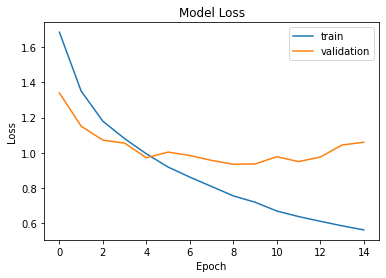

In [ ]:
evaluate_plotLosses(model2, history)

The difference between the validation and training loss reduced. However, there is still some overfitting and underfitting. To try to improve test accuracy, the learning rate was lowered to 0.001 and the number of epochs was increased. Smaller learning rates need more training epochs because smaller changes are made to the weights during each update.

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
# Dropout layer added here
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

history = model3.fit(x_train, y_train, batch_size=32, epochs=25, verbose=2, validation_data= (x_val, y_val))

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
 - 6s - loss: 2.0032 - accuracy: 0.2705 - val_loss: 1.7249 - val_accuracy: 0.3910
Epoch 2/25
 - 6s - loss: 1.6891 - accuracy: 0.3938 - val_loss: 1.5263 - val_accuracy: 0.4550
Epoch 3/25
 - 6s - loss: 1.5523 - accuracy: 0.4407 - val_loss: 1.4207 - val_accuracy: 0.4988
Epoch 4/25
 - 6s - loss: 1.4611 - accuracy: 0.4763 - val_loss: 1.3533 - val_accuracy: 0.5148
Epoch 5/25
 - 6s - loss: 1.3908 - accuracy: 0.5015 - val_loss: 1.2888 - val_accuracy: 0.5428
Epoch 6/25
 - 6s - loss: 1.3310 - accuracy: 0.5218 - val_loss: 1.2349 - val_accuracy: 0.5626
Epoch 7/25
 - 6s - loss: 1.2778 - accuracy: 0.5451 - val_loss: 1.1902 - val_accuracy: 0.5760
Epoch 8/25
 - 6s - loss: 1.2280 - accuracy: 0.5604 - val_loss: 1.1453 - val_accuracy: 0.5964
Epoch 9/25
 - 6s - loss: 1.1817 - accuracy: 0.5802 - val_loss: 1.1149 - val_accuracy: 0.6024
Epoch 10/25
 - 7s - loss: 1.1426 - accuracy: 0.5922 - val_loss: 1.0857 - val_accuracy: 0.6179
Epoch 11/25
 - 6s -

Test loss: 0.894
Test accuracy: 0.694


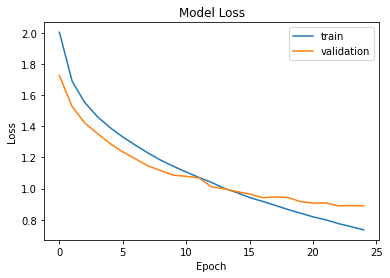

In [ ]:
evaluate_plotLosses(model3, history)

In this iteration we were able to reduce overfitting and also increase the test accuracy. To increase test accuracy even further, 2 more convolution layers and 1 MaxPool layer along with dropout was added. RMSprop optimizer with a learning rate of 0.0001 and 25 epochs were also used.

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10))
model4.add(Activation('softmax'))


opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)


model4.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model4.fit(x_train, y_train, batch_size= 32, epochs= 25, validation_data=(x_val, y_val), shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 9s 218us/step - loss: 1.8904 - accuracy: 0.3088 - val_loss: 1.5953 - val_accuracy: 0.4293
Epoch 2/25
40000/40000 [==============================] - 8s 208us/step - loss: 1.5673 - accuracy: 0.4264 - val_loss: 1.4125 - val_accuracy: 0.4944
Epoch 3/25
40000/40000 [==============================] - 8s 208us/step - loss: 1.4270 - accuracy: 0.4838 - val_loss: 1.2951 - val_accuracy: 0.5380
Epoch 4/25
40000/40000 [==============================] - 8s 207us/step - loss: 1.3320 - accuracy: 0.5208 - val_loss: 1.3189 - val_accuracy: 0.5350
Epoch 5/25
40000/40000 [==============================] - 8s 210us/step - loss: 1.2556 - accuracy: 0.5519 - val_loss: 1.1923 - val_accuracy: 0.5715
Epoch 6/25
40000/40000 [==============================] - 8s 207us/step - loss: 1.1950 - accuracy: 0.5750 - val_loss: 1.1251 - val_accuracy: 0.5968
Epoch 7/25
40000/40000 [==============================] - 8s 2

Test loss: 0.739
Test accuracy: 0.748


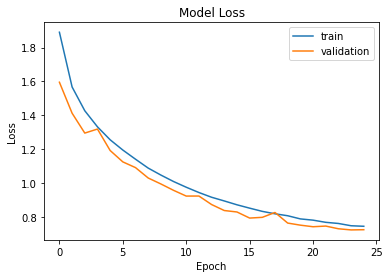

In [ ]:
evaluate_plotLosses(model4, history)

We were able to increase test accuracy in this iteration. But the history plot above shows that there is some underfitting. Increasing the number of epochs in the next iteration reduced some of this underfitting.

In [ ]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Conv2D(32, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10))
model5.add(Activation('softmax'))


opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)


model5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = model5.fit(x_train, y_train, batch_size= 32, epochs= 50, validation_data=(x_val, y_val), shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 9s 214us/step - loss: 1.8850 - accuracy: 0.3120 - val_loss: 1.6068 - val_accuracy: 0.4270
Epoch 2/50
40000/40000 [==============================] - 8s 203us/step - loss: 1.5398 - accuracy: 0.4404 - val_loss: 1.3981 - val_accuracy: 0.5032
Epoch 3/50
40000/40000 [==============================] - 8s 206us/step - loss: 1.4085 - accuracy: 0.4943 - val_loss: 1.2706 - val_accuracy: 0.5491
Epoch 4/50
40000/40000 [==============================] - 8s 204us/step - loss: 1.3155 - accuracy: 0.5297 - val_loss: 1.2336 - val_accuracy: 0.5671
Epoch 5/50
40000/40000 [==============================] - 8s 204us/step - loss: 1.2393 - accuracy: 0.5634 - val_loss: 1.1499 - val_accuracy: 0.5881
Epoch 6/50
40000/40000 [==============================] - 8s 206us/step - loss: 1.1730 - accuracy: 0.5875 - val_loss: 1.0802 - val_accuracy: 0.6191
Epoch 7/50
40000/40000 [==============================] - 8s 2

Test loss: 0.678
Test accuracy: 0.776


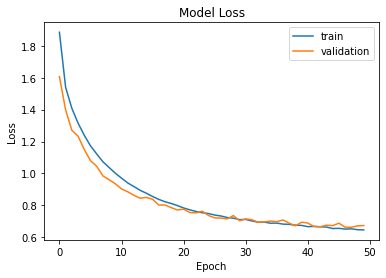

In [ ]:
evaluate_plotLosses(model5, history)

Test accuracy has now significantly increased compared to our initial model. The training and validation loss curves in the history plot above also closely follow each other. With the model trained, it was next used to make predictions about test images.

## Making Predictions

In [ ]:
predictions = model5.predict(x_test)

In [ ]:
#functions to plot test images along with their predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Test images was plotted along with the prediction and prediction array. Correct predictions labels are shown in blue and incorrect ones are shown in red. The percentage for the predicted label is also shown.

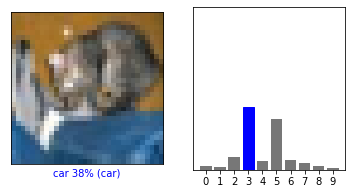

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

The model predicts that the 0th test image is a car with 38% confidence. This prediction is correct as the true label for the 0th image is also 'car'.

The first 15 test images are plotted below along with their predictions. The trained model was able to give correct predictions for all 15.

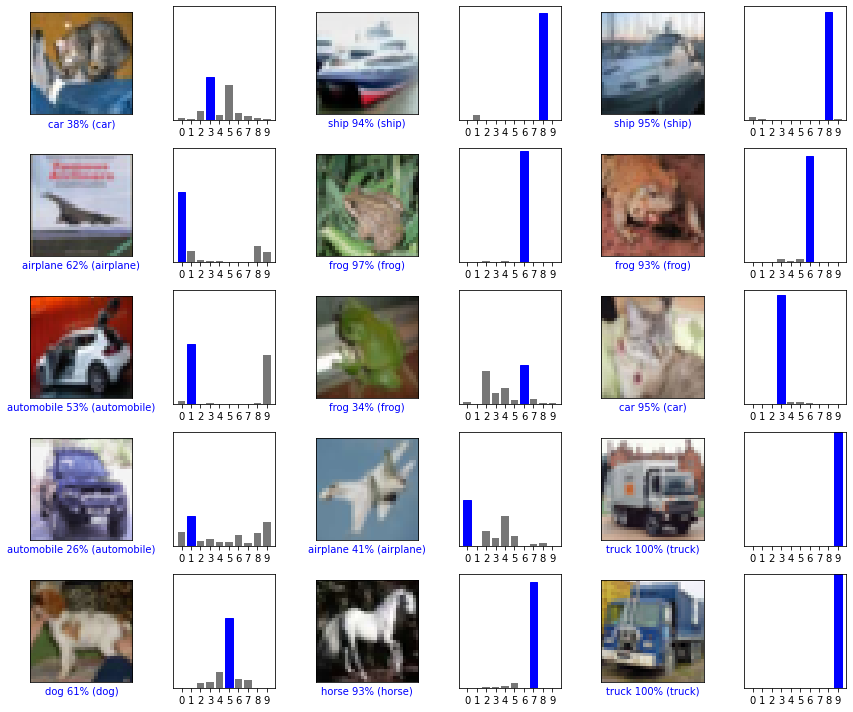

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()